In [ ]:
# # only need to import the function you want to use
#     # secondary functions, that are called within the imported one, don't need to be importex explicitly
# from volume_change import V_von_h

# V_von_h(10)

In [9]:
# create in and outflux vectors
import pandas as pd
import numpy as np
from numpy import cos,sin
from volume_change import V_h_test_1,h_V_test_1,V_h_test_2,h_V_test_2
from flow_patterns import return_flux_profiles,make_flux_df


t_max = 1000
timestep = 00.1
time = np.arange(0,t_max,timestep)
#input identifiers
i_i = 'st_0010_0010'
#output identifiers
o_i = 'st_0010_0010'
# influx and outflux offset
i_o = 7.5
o_o = 8.
#outflux delay
o_d = 5

influx, outflux = return_flux_profiles(len(time),i_i,o_i,i_o,o_o,o_d)


h_0 = 0.

V_t = np.empty_like(time,dtype=float)
h_t = np.empty_like(time,dtype=float)
delta_Q = np.empty_like(time,dtype=float)
delta_V = np.empty_like(time,dtype=float)

for i in range(len(time)):
    delta_Q[i] = influx[i]-outflux[i]
    delta_V[i] = delta_Q[i]*timestep
    if i == 0:
        V_t[0] = V_h_test_2(h_0)
    else:
        V_t[i] = V_t[i-1]+delta_V[i]
    
    h_t[i] = h_V_test_2(V_t[i])

df = pd.DataFrame(np.transpose([time,influx,outflux,h_t,V_t]),columns=['time','influx','outflux','h_t','V_t'])

<AxesSubplot:xlabel='time'>

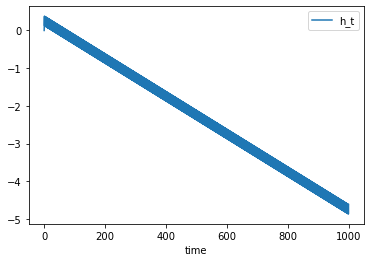

In [12]:
from matplotlib import pyplot as plt
df.plot(x='time',y='h_t')^

fig = plt(df[])



In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "vscode"


fig1 = make_subplots(3,1,subplot_titles=('Height','Volume','Fluxes'))

fig1.add_trace(go.Scatter(x=df['time'],y=df['h_t'],name='height',mode='lines+markers',marker=dict(size=5)),row=1,col=1)
fig1.add_trace(go.Scatter(x=df['time'],y=df['V_t'],name='volume',mode='lines+markers',marker=dict(size=5)),row=2,col=1)
fig1.add_trace(go.Scatter(x=df['time'],y=df['influx'],name='influx',mode='lines+markers',marker=dict(size=5)),row=3,col=1)
fig1.add_trace(go.Scatter(x=df['time'],y=df['outflux'],name='outlfux',mode='lines+markers',marker=dict(size=5)),row=3,col=1)

fig1.update_xaxes(title_text = 'time',row=1,col=1)
fig1.update_xaxes(title_text = 'time',row=2,col=1)
fig1.update_xaxes(title_text = 'time',row=3,col=1)
fig1.update_yaxes(title_text = 'h(t)',row=1,col=1)
fig1.update_yaxes(title_text = 'V(t)',row=2,col=1)
fig1.update_yaxes(title_text = 'Q(t)',row=3,col=1)

fig1.update_layout(height=700)

fig2 = px.scatter(df,x='time',y='h_t',animation_frame='time')
fig2.update_xaxes(range=[0,100])
fig2.update_yaxes(range=[0,5])
fig1.show()
fig2.show('notebook')